In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from keras.src.datasets import mnist 
from keras.src.models import Sequential
from keras.src.layers import Dense, Activation, Dropout
from keras.src.utils import to_categorical, plot_model

import warnings
warnings.filterwarnings('ignore')

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
unique, counts = np.unique(y_train, return_counts=True)
pd.DataFrame({'unique': unique, 'counts': counts})

,unique,counts
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


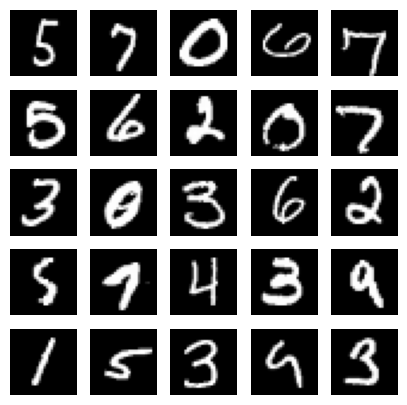

In [4]:
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5, 5))
for i in range(len(images)):
    plt.subplot(5,5,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
plt.show()
plt.close('all')

In [5]:
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
image_size = X_train.shape[1]
input_size = image_size*image_size

In [6]:
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float')/255
X_test  = np.reshape(X_test, [-1,input_size])
X_test  = X_test.astype('float32')/255

In [7]:
batch_size = 128     
hidden_units = 256
dropout = 0.45

In [8]:
model = Sequential()
model.add(Dense(hidden_units, input_dim = input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))

In [9]:
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='mlp-mnist.png', show_dtype=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7672 - loss: 0.7234
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9376 - loss: 0.2090
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9540 - loss: 0.1566
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9613 - loss: 0.1301
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9653 - loss: 0.1128
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9698 - loss: 0.1005
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9715 - loss: 0.0898
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9738 - loss: 0.0839
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9757 - loss: 0.0804
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9749 - loss: 0.0757
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9776 - loss: 0.0708
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [12]:
_, acc = model.evaluate(X_test, 
                        y_test,
                        batch_size=batch_size,
                        verbose=0)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 98.1%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


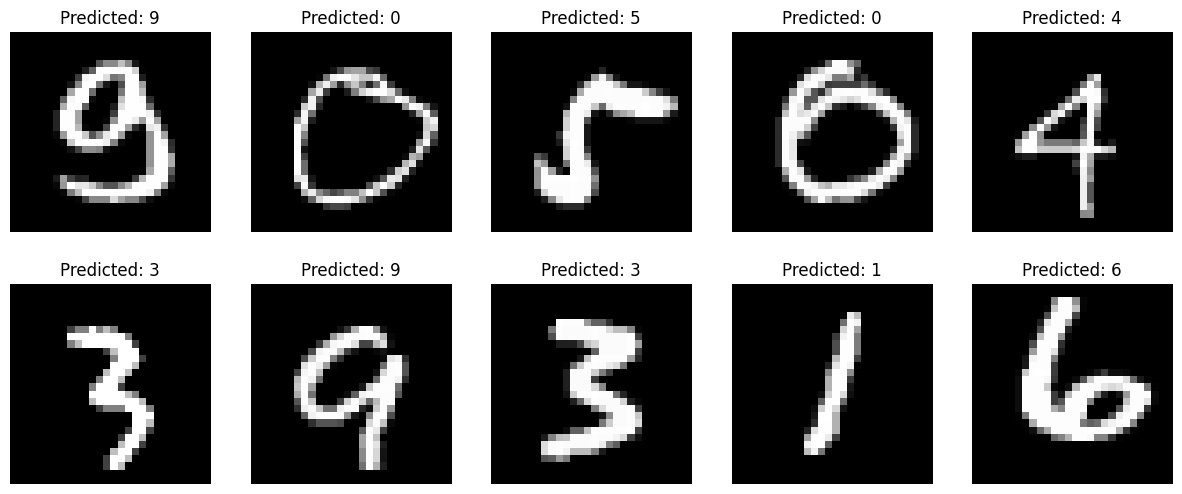

In [14]:
predictions = model.predict(X_test)

num_samples = 10
random_indices = np.random.choice(len(X_test), num_samples, replace=False)

output = pd.DataFrame({'Id': indexes,
                       'Label': np.argmax(predictions)})
output.to_csv('submission.csv', index=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, num_samples//2, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title("Predicted: %d" % np.argmax(predictions[idx]))
    plt.axis('off')
plt.show()